<a href="https://colab.research.google.com/github/zoeera/FMML-projects-and-labs/blob/main/Module_3_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MODULE 3: CLASSIFICATION-1
### LAB-2 : Implementing KNN from scratch and visualize Algorithm performance

---

# **Section 1: Implementing KNN**

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [31]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [32]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [33]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

In [34]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

## Section 1.1 - Iris Dataset

In [35]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [37]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


In [38]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


##  Section 1.2: Weighted NN


In [39]:
import numpy as np
from collections import Counter

def predict(X_train, y_train, X_test, k):
    distances = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distance = np.sqrt(np.sum(np.square(X_test - X_train[i, :])))
        distances.append((distance, y_train[i]))

    distances.sort(key=lambda x: x[0])

    # return the k-nearest neighbours along with their distances
    return distances[:k]

def k_nearest_neighbor(X_train, y_train, X_test, k):
    assert k <= len(X_train), "[!] K cannot be larger than the number of samples."

    # loop over all observations
    all_neighbors = []
    for i in range(len(X_test)):
        neighbors = predict(X_train, y_train, X_test[i, :], k)
        all_neighbors.append(neighbors)

    return all_neighbors

# Example usage
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target

X = np.array(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
y = np.array(df['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

# Get the k-nearest neighbours and their distances
neighbors = k_nearest_neighbor(X_train, y_train, X_test, 7)

# Print the results for the first test sample
print("K-nearest neighbors and their distances for the first test sample:")
for dist, label in neighbors[0]:
    print(f"Distance: {dist:.2f}, Label: {label}")


K-nearest neighbors and their distances for the first test sample:
Distance: 0.35, Label: 0
Distance: 0.39, Label: 0
Distance: 0.41, Label: 0
Distance: 0.46, Label: 0
Distance: 0.46, Label: 0
Distance: 0.47, Label: 0
Distance: 0.48, Label: 0


# **Section 2: Visualizing Data**  



### Voronoi Diagrams  



In [40]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

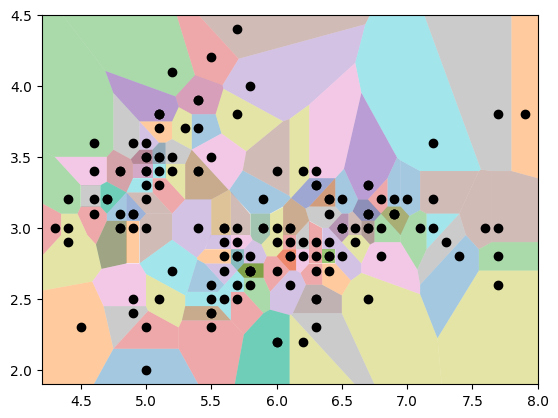

In [41]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

## Section 2.2: Understanding Decision Boundaries  


### Decision Boundary


In [42]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


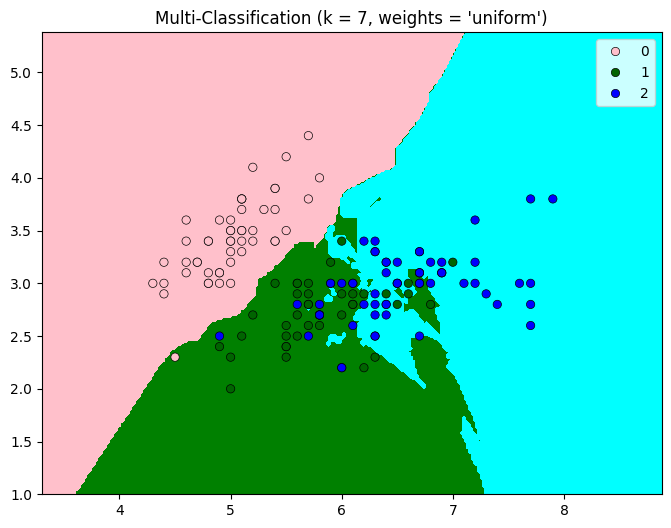

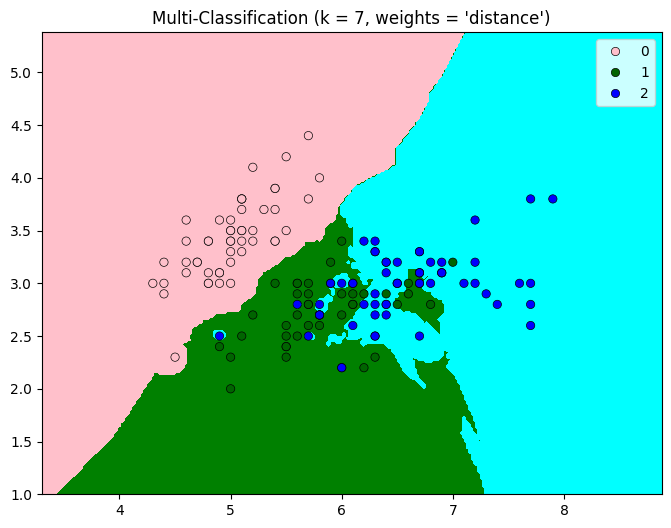

In [43]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

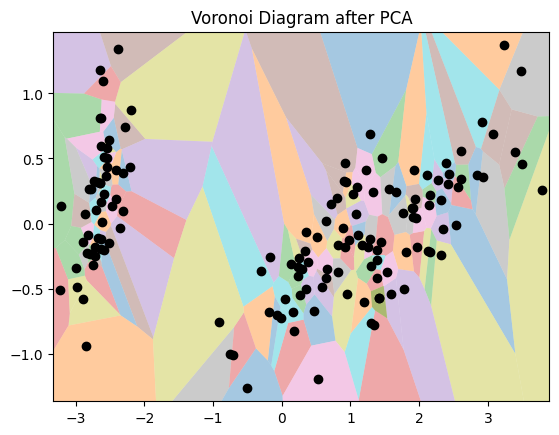

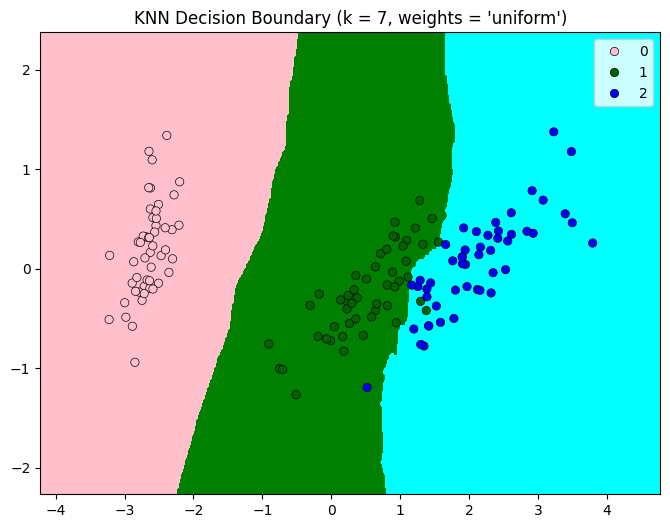

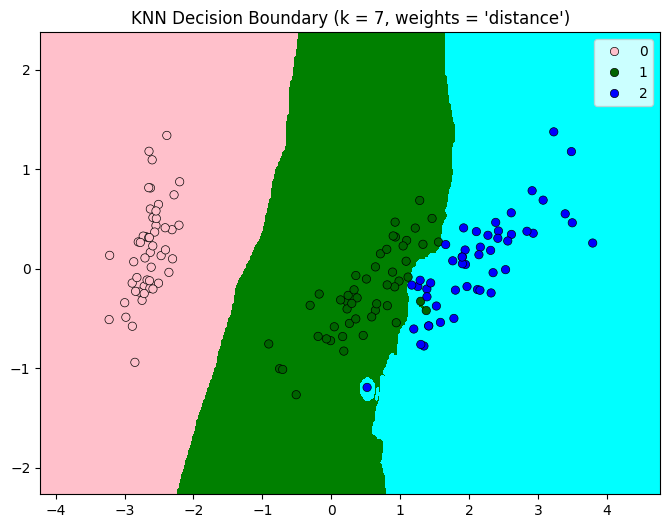

In [44]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import ListedColormap
import seaborn as sns

# Apply PCA to reduce to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Voronoi diagram
points = X_pca
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

plt.figure()
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:, 0], points[:, 1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.title('Voronoi Diagram after PCA')
plt.show()

# Decision boundaries plot
def decision_boundary_plot(x_dec, y_dec, k):
    h = .02
    n = len(set(y_dec))
    cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
    cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

    for weights in ['uniform', 'distance']:
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
        clf.fit(x_dec, y_dec)

        x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
        y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light)
        sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                        palette=cmap_bold, alpha=1.0, edgecolor="black")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("KNN Decision Boundary (k = %i, weights = '%s')" % (k, weights))
    plt.show()

decision_boundary_plot(X_pca, y, 7)


## Section 2.3: Confusion Matrix  


In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 23.52222222222222, 'Predicted label')

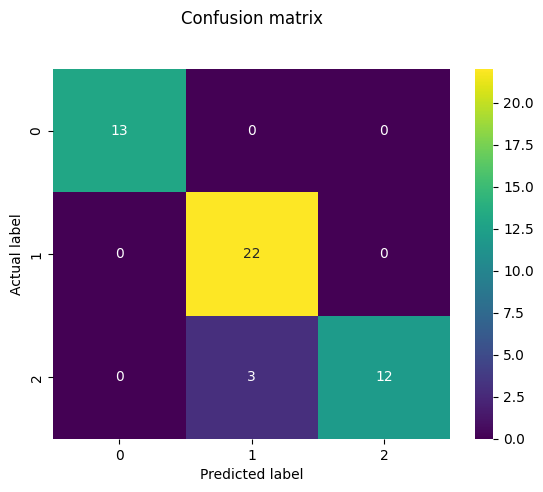

In [47]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Section 2.4: Classification Report



In [48]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



### **Car Evaluation Dataset**

In [49]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation (1).csv


In [50]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [51]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [52]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


The accuracy of the classifier on Car evaluation dataset is 89.88 %


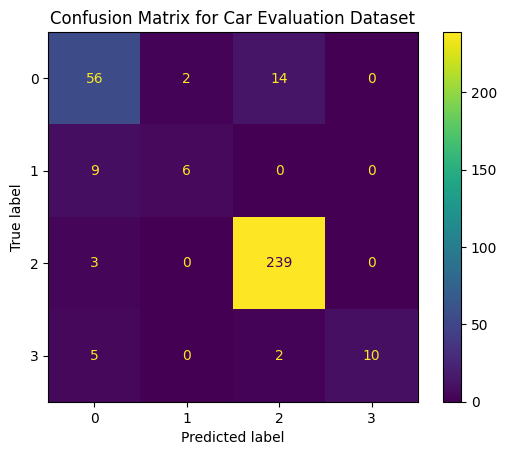

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        72
           1       0.75      0.40      0.52        15
           2       0.94      0.99      0.96       242
           3       1.00      0.59      0.74        17

    accuracy                           0.90       346
   macro avg       0.86      0.69      0.75       346
weighted avg       0.90      0.90      0.89       346



In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

# Upload the Car Evaluation dataset (ensure it's in your working directory)
car_df = pd.read_csv('car_evaluation.csv')

# Encode categorical features
for x in car_df.columns:
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x] = le.transform(car_df[x])

# Prepare the dataset
X = car_df.iloc[:, :-1].values  # Features
y = car_df.iloc[:, -1].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Evaluate the classifier
accuracy = (predictions == y_test).mean()
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100 * accuracy))

# Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=knn.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for Car Evaluation Dataset')
plt.show()

# Print classification report
print(classification_report(y_test, predictions))


In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import preprocessing

# Load the dataset
car_df = pd.read_csv('car_evaluation.csv')

# Encode categorical features
for x in car_df.columns:
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x] = le.transform(car_df[x])

# Prepare the dataset
X = car_df.iloc[:, :-1].values  # Features
y = car_df.iloc[:, -1].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car Evaluation dataset is {:.2f} %".format(100 * accuracy))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


The accuracy of the classifier on Car Evaluation dataset is 89.88 %
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77        72
           1       0.75      0.40      0.52        15
           2       0.94      0.99      0.96       242
           3       1.00      0.59      0.74        17

    accuracy                           0.90       346
   macro avg       0.86      0.69      0.75       346
weighted avg       0.90      0.90      0.89       346



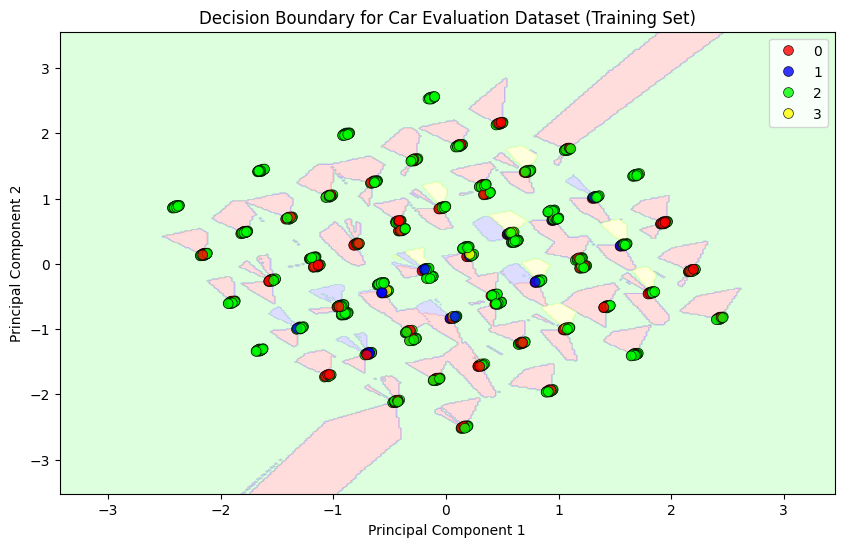

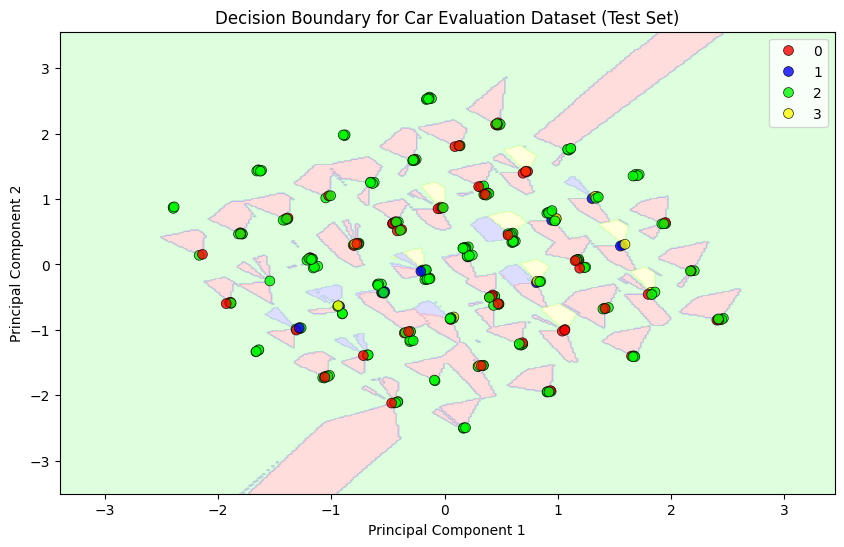

The accuracy of the classifier on Car Evaluation dataset is 63.58 %


In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import preprocessing

# Load the dataset
car_df = pd.read_csv('car_evaluation.csv')

# Encode categorical features
for x in car_df.columns:
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x] = le.transform(car_df[x])

# Prepare the dataset
X = car_df.iloc[:, :-1].values  # Features
y = car_df.iloc[:, -1].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Apply PCA to reduce to two dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
predictions = knn.predict(X_test_pca)

# Plot the decision boundaries
def plot_decision_boundary(X, y, clf, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA']))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FFFF00']),
                    edgecolor="black", s=50, alpha=0.8)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

plot_decision_boundary(X_train_pca, y_train, knn, "Decision Boundary for Car Evaluation Dataset (Training Set)")
plot_decision_boundary(X_test_pca, y_test, knn, "Decision Boundary for Car Evaluation Dataset (Test Set)")

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car Evaluation dataset is {:.2f} %".format(100 * accuracy))


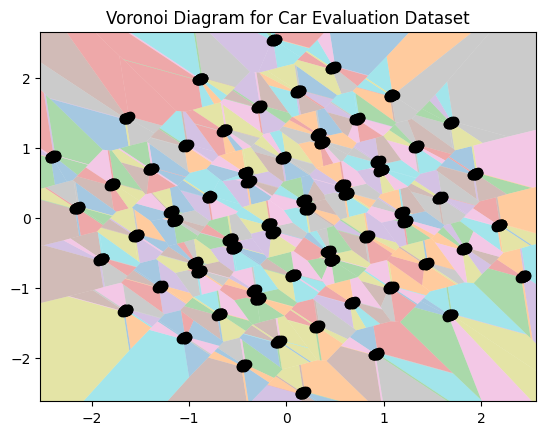

In [57]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Load the dataset
car_df = pd.read_csv('car_evaluation.csv')

# Encode categorical features
for x in car_df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(car_df[x])
    car_df[x] = le.transform(car_df[x])

# Prepare the dataset
X = car_df.iloc[:, :-1].values  # Features
y = car_df.iloc[:, -1].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Apply PCA to reduce to two dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Voronoi diagram
points = X_train_pca
vor = Voronoi(points)

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite Voronoi regions in a 2D diagram to finite regions.
    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            # Compute the missing endpoint of an infinite ridge
            t = vor.points[p2] - vor.points[p1]  # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:, 1] - c[1], vs[:, 0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

regions, vertices = voronoi_finite_polygons_2d(vor)

plt.figure()
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:, 0], points[:, 1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.title('Voronoi Diagram for Car Evaluation Dataset')
plt.show()


### Questions to Think About and Answer
1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to 'distance'. Find out the difference between these two.

Weights: 'uniform'
All neighbors contribute equally.

Weights: 'distance'
Closer neighbors have more influence.

Impact: uniform gives a more generalized boundary; distance adapts to local data structure.
2. What do you think could be the drawbacks of using KNN ?

Computationally Intensive: KNN can be slow, especially with large datasets, because it calculates the distance to every point.

Storage Requirement: It needs to store all the data, which can be hefty for large datasets.

Sensitive to Noise: KNN can misclassify noisy data or outliers, as it treats all features as equally important.

Dimensionality Curse: Performance can degrade with high-dimensional data due to increased distance between points.

Imbalanced Classes: It may struggle with imbalanced datasets, where some classes have significantly more samples than others